In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

## MSOA area data

data for part 2

In [2]:
# Load data

# load local boundary
mosa_london_json = gpd.read_file('./MSOA_London.json')
# mosa_london_json.head(2)
london_msoa = mosa_london_json.to_crs(epsg=27700)
# london_msoa.crs


# load tube line
london_tube_json = gpd.read_file('./london_tube.json')
# london_tube_json.head(2)
london_tube = london_tube_json.to_crs(epsg=27700)
# london_tube.crs

In [3]:
# Make buffer zone

# select the Jubilee line
line_Jubilee = london_tube.query("Line_name=='Jubilee'")

# get the buffer area
buffer_Jubilee = line_Jubilee.buffer(1000)
buffer_Jubilee = gpd.GeoDataFrame(geometry=buffer_Jubilee)

In [4]:
# spatial join to find intersected or contained MSOAs
london_Jubilee_msoa_area = london_msoa.sjoin(buffer_Jubilee, how="left", op="intersects")
london_Jubilee_msoa_area = london_Jubilee_msoa_area.dropna().reset_index(drop=True)
london_Jubilee_msoa_area = london_Jubilee_msoa_area.rename(columns={'MSOA01CD': 'MSOA_CODE'})
london_Jubilee_msoa_area = london_Jubilee_msoa_area.drop(['UserID', 'index_right'], axis=1)
london_Jubilee_msoa_area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MSOA_CODE  120 non-null    object  
 1   MSOA01NM   120 non-null    object  
 2   MSOA01NMW  120 non-null    object  
 3   geometry   120 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 3.9+ KB


C:\Users\29425\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


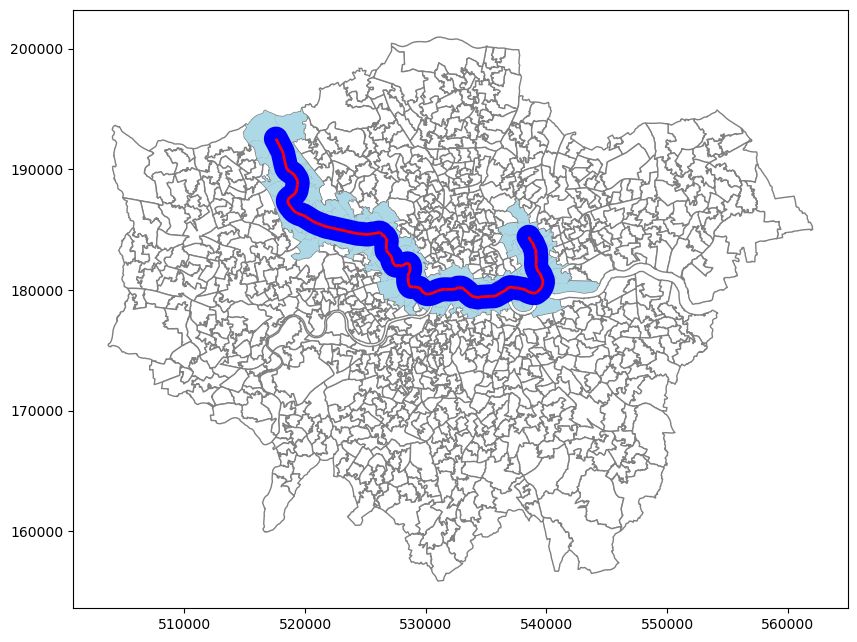

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
london_msoa.plot(ax=ax, color='white', edgecolor='grey')
london_Jubilee_msoa_area.plot(ax=ax, color='lightblue')
line_Jubilee.plot(ax=ax, color='red', linewidth=2)
buffer_Jubilee.plot(ax=ax, color='blue')
plt.show()

In [6]:
# Get lookup table
csv_housing_price = pd.read_csv('./houseprice_msoa.csv')

msoa_lookup_table = csv_housing_price.iloc[:, :4].copy()
msoa_lookup_table = msoa_lookup_table.rename(columns={'Local authority code': 'LA_code',
                                                      'Local authority name': 'LA_name',
                                                      'MSOA code': 'MSOA_code',
                                                      'MSOA name': 'MSOA_name'})
msoa_lookup_table.head(3)
msoa_lookup_table.to_csv('./msoa_lookup_table.csv', index=False)

In [7]:
# csv_pop
csv_pop = pd.read_csv('./pop_02to20_MSOA.csv')
# rename the df
col_rename = {'MSOA11CD': 'MSOA_CODE'}
for year in range(2002, 2021):
    old_col = str(year) + 'pop'
    new_col = 'POP_' + str(year)
    col_rename[old_col] = new_col


csv_pop = csv_pop.rename(columns=col_rename)
csv_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MSOA_CODE  951 non-null    object
 1   POP_2002   951 non-null    int64 
 2   POP_2003   951 non-null    int64 
 3   POP_2004   951 non-null    int64 
 4   POP_2005   951 non-null    int64 
 5   POP_2006   951 non-null    int64 
 6   POP_2007   951 non-null    int64 
 7   POP_2008   951 non-null    int64 
 8   POP_2009   951 non-null    int64 
 9   POP_2010   951 non-null    int64 
 10  POP_2011   951 non-null    int64 
 11  POP_2012   951 non-null    int64 
 12  POP_2013   951 non-null    int64 
 13  POP_2014   951 non-null    int64 
 14  POP_2015   951 non-null    int64 
 15  POP_2016   951 non-null    int64 
 16  POP_2017   951 non-null    int64 
 17  POP_2018   951 non-null    int64 
 18  POP_2019   951 non-null    int64 
 19  POP_2020   951 non-null    int64 
dtypes: int64(19), object(1)
memory u

In [50]:
# csv_housing_price
csv_housing_price = pd.read_csv('./houseprice_msoa.csv')
csv_housing_price = csv_housing_price.drop(['Local authority code', 'Local authority name', 'MSOA name'], axis=1)
csv_housing_price = csv_housing_price.rename(columns={'MSOA code': 'MSOA_CODE'})
csv_housing_price = csv_housing_price.rename(columns=lambda x: "HP_" + x if x != "MSOA_CODE" else x)
csv_housing_price.head(2)

,MSOA_CODE,HP_1996_mean,HP_1997_mean,HP_1998_mean,HP_1999_mean,HP_2000_mean,HP_2001_mean,HP_2002_mean,HP_2003_mean,HP_2004_mean,...,HP_2013_med,HP_2014_med,HP_2015_med,HP_2016_med,HP_2017_med,HP_2018_med,HP_2019_med,HP_2020_med,HP_2021_med,HP_2022_med
0,E02000001,139049,149155,218424,235669,225851,278993,258048,313896,297974,...,558750,683525,811125,806988,837494,885295,909351,891406,770625,750417
1,E02000002,54649,64713,77199,73062,81633,92993,112618,144921,164416,...,193750,205125,239687,279875,311050,316375,340750,349563,350750,370833


In [18]:
# csv_income
csv_income = pd.read_csv('./income_01to12.csv')
csv_income = csv_income.drop(['MSOA_name', 'Local_authority_code', 'Local_authority_name'], axis=1)
csv_income = csv_income.rename(columns={'MSOA_code': 'MSOA_CODE'})
csv_income = csv_income.rename(columns=lambda x: "INC_" + x if x != "MSOA_CODE" else x)
csv_income = csv_income.rename(columns=lambda x: x[:-3] if x != "MSOA_CODE" else x)

csv_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSOA_CODE        983 non-null    object
 1   INC_Mean_2001    983 non-null    int64 
 2   INC_Mean_2002    983 non-null    int64 
 3   INC_Mean_2003    983 non-null    int64 
 4   INC_Mean_2004    983 non-null    int64 
 5   INC_Mean_2005    983 non-null    int64 
 6   INC_Mean_2006    983 non-null    int64 
 7   INC_Mean_2007    983 non-null    int64 
 8   INC_Mean_2008    983 non-null    int64 
 9   INC_Mean_2009    983 non-null    int64 
 10  INC_Mean_2010    983 non-null    int64 
 11  INC_Mean_2011    983 non-null    int64 
 12  INC_Mean_2012    983 non-null    int64 
 13  INC_Median_2001  983 non-null    int64 
 14  INC_Median_2002  983 non-null    int64 
 15  INC_Median_2003  983 non-null    int64 
 16  INC_Median_2004  983 non-null    int64 
 17  INC_Median_2005  983 non-null    in

In [19]:
# add data/ merge data
london_Jubilee_msoa_area_data = pd.merge(london_Jubilee_msoa_area, csv_pop, on='MSOA_CODE', how='left')
london_Jubilee_msoa_area_data = pd.merge(london_Jubilee_msoa_area_data, csv_housing_price, on='MSOA_CODE', how='left')
london_Jubilee_msoa_area_data = pd.merge(london_Jubilee_msoa_area_data, csv_income, on='MSOA_CODE', how='left')
london_Jubilee_msoa_area_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 101 entries, MSOA_CODE to INC_Median_2012
dtypes: float64(97), geometry(1), object(3)
memory usage: 94.8+ KB


In [20]:
london_Jubilee_msoa_area_data = london_Jubilee_msoa_area_data.fillna(0)

In [21]:
# save the Part 2 data

# Get the MSOA data
london_Jubilee_msoa_area_data_output = london_Jubilee_msoa_area_data.to_crs(epsg='4326')
london_Jubilee_msoa_area_data_output.to_file('london_Jubilee_msoa_area_data.geojson', driver='GeoJSON')

# Get the buffer data
buffer_Jubilee_output = buffer_Jubilee.to_crs(epsg='4326')
buffer_Jubilee_output.to_file('buffer_Jubilee_1km.geojson', driver='GeoJSON')

## Footprint data for Part3

for part3

In [34]:
fp_cw_07 = gpd.read_file('./footprint/CW_2007.geojson')
fp_cw_09 = gpd.read_file('./footprint/CW_2009.geojson')

In [41]:
fp_cw_07.head(5)

,id,fid,featurecode,version,versiondate,theme,calculatedareavalue,changedate,reasonforchange,descriptivegroup,descriptiveterm,make,physicallevel,physicalpresence,poly_broken,geometry
0,25349,osgb1000041727902,10021,8,2006-02-18,Buildings,2685.638736,"1983-01-04,1988-07-06,2003-10-23","New,New,Attributes",Building,NaN,Manmade,50,NaN,NaN,"MULTIPOLYGON (((-0.03487 51.49256, -0.03518 51..."
1,2203,osgb1000041727939,10021,3,2005-06-20,Buildings,10.827,1996-04-24,New,Building,NaN,Manmade,50,NaN,NaN,"MULTIPOLYGON (((-0.03640 51.49276, -0.03635 51..."
2,25353,osgb1000041727946,10021,4,2005-06-20,Buildings,50.720904,1996-04-24,New,Building,NaN,Manmade,50,NaN,NaN,"MULTIPOLYGON (((-0.03606 51.49264, -0.03611 51..."
3,25354,osgb1000041727947,10021,3,2005-06-20,Buildings,45.77464,1996-04-24,New,Building,NaN,Manmade,50,NaN,NaN,"MULTIPOLYGON (((-0.03598 51.49265, -0.03600 51..."
4,21072,osgb1000041727949,10021,3,2005-06-20,Buildings,47.569304,1996-04-24,New,Building,NaN,Manmade,50,NaN,NaN,"MULTIPOLYGON (((-0.03603 51.49277, -0.03611 51..."


In [32]:
def getBuildingChange(poly_old, poly_new):
    old_cliped = poly_old.clip(poly_new) # gone
    new_cliped = poly_new.clip(poly_old) # born
    return old_cliped, new_cliped

In [35]:
gone, born = getBuildingChange(fp_cw_07,fp_cw_09)

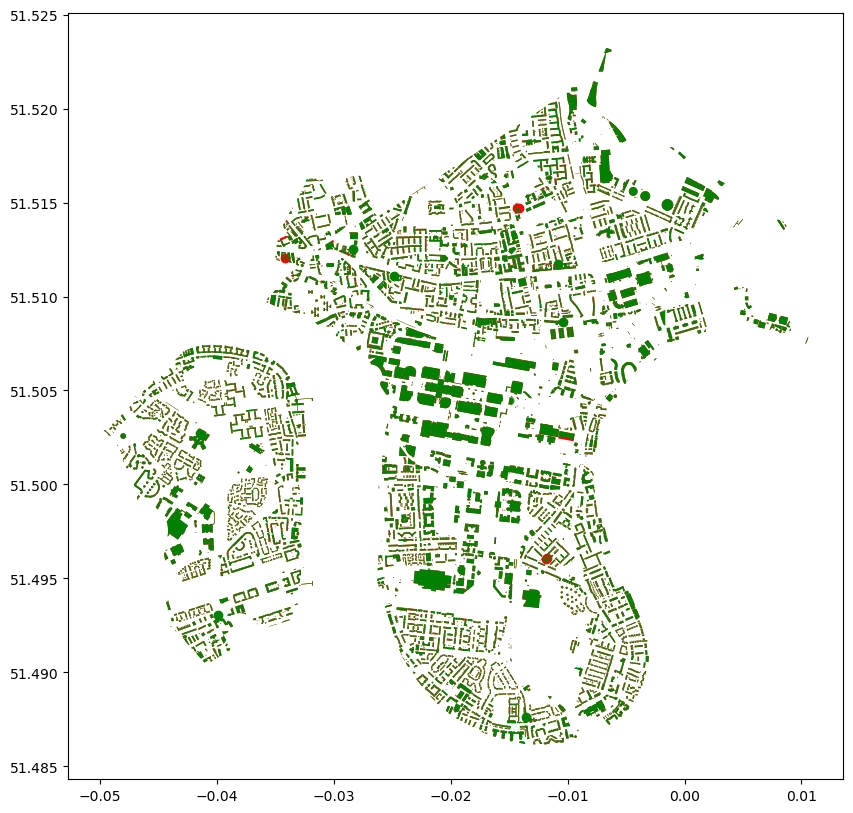

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
gone.plot(ax=ax, color='red')
born.plot(ax=ax, color='green')
plt.show()

## Convert the data

In [2]:
london_tube = gpd.read_file('./london_tube.json')

<AxesSubplot:>

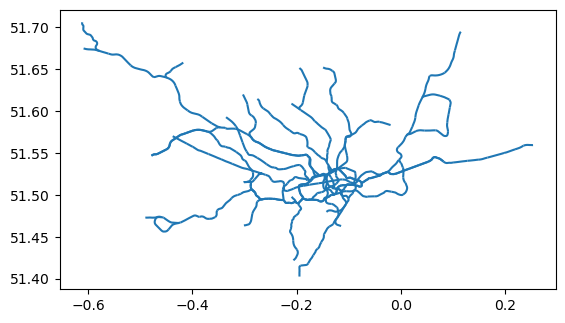

In [5]:
london_tube.crs
london_tube.plot()

In [6]:
london_tube.to_file('london_tube.geojson', driver='GeoJSON')

## Data for Part2 bar chart

Calculate the rate of change of economic correlations (house prices and income) by making the data in the form of geojson, 02-12

In [24]:
# london_Jubilee_msoa_area
print(london_Jubilee_msoa_area.info())
london_Jubilee_msoa_area.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MSOA_CODE  120 non-null    object  
 1   MSOA01NM   120 non-null    object  
 2   MSOA01NMW  120 non-null    object  
 3   geometry   120 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 3.9+ KB
None


,MSOA_CODE,MSOA01NM,MSOA01NMW,geometry
0,E02000001,City of London 001,City of London 001,"POLYGON ((531295.913 180813.249, 531256.234 18..."
1,E02000037,Barnet 014,Barnet 014,"POLYGON ((520032.689 193668.242, 520030.734 19..."


In [26]:
# get change rate
def getChangeRate(year1, year2):
    return (year2-year1)/year1

### Pop change

In [29]:
# get population data
print(csv_pop.info())
csv_pop.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MSOA_CODE  951 non-null    object
 1   POP_2002   951 non-null    int64 
 2   POP_2003   951 non-null    int64 
 3   POP_2004   951 non-null    int64 
 4   POP_2005   951 non-null    int64 
 5   POP_2006   951 non-null    int64 
 6   POP_2007   951 non-null    int64 
 7   POP_2008   951 non-null    int64 
 8   POP_2009   951 non-null    int64 
 9   POP_2010   951 non-null    int64 
 10  POP_2011   951 non-null    int64 
 11  POP_2012   951 non-null    int64 
 12  POP_2013   951 non-null    int64 
 13  POP_2014   951 non-null    int64 
 14  POP_2015   951 non-null    int64 
 15  POP_2016   951 non-null    int64 
 16  POP_2017   951 non-null    int64 
 17  POP_2018   951 non-null    int64 
 18  POP_2019   951 non-null    int64 
 19  POP_2020   951 non-null    int64 
dtypes: int64(19), object(1)
memory u

,MSOA_CODE,POP_2002,POP_2003,POP_2004,POP_2005,POP_2006,POP_2007,POP_2008,POP_2009,POP_2010,POP_2011,POP_2012,POP_2013,POP_2014,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020
0,E02000001,7280,7115,7118,7131,7254,7607,7429,7472,7338,7412,6612,6031,6139,8760,9401,7654,8706,9721,10938
1,E02000002,6333,6312,6329,6341,6330,6323,6369,6570,6636,6783,6847,7131,7297,7301,7525,7734,7720,7735,7726


In [60]:
# get 'pop_change'
# create a new dataframe to store the population change rates
pop_change = pd.DataFrame()
# add the MSOA_CODE column to the new dataframe
pop_change['MSOA_CODE'] = csv_pop['MSOA_CODE']

# loop through each year to calculate the population change rates
for i in range(2002, 2020):
    # get the column names for the two consecutive years
    year1_col = 'POP_' + str(i)
    year2_col = 'POP_' + str(i+1)
    
    # calculate the population change rate using the getChangeRate function
    change_rate = csv_pop.apply(lambda row: getChangeRate(row[year1_col], row[year2_col]), axis=1)
    
    # add the population change rate to the new dataframe with the appropriate column name
    col_name = 'pop_change_' + str(i+1)
    pop_change[col_name] = change_rate

# special requirment
pop_change['pop_change_2002_2020'] = csv_pop.apply(lambda row: getChangeRate(row['POP_2002'], row['POP_2020']), axis=1)
pop_change['pop_change_2002_2012'] = csv_pop.apply(lambda row: getChangeRate(row['POP_2002'], row['POP_2012']), axis=1)

# print the first few rows of the new dataframe
pop_change.head(2)


,MSOA_CODE,pop_change_2003,pop_change_2004,pop_change_2005,pop_change_2006,pop_change_2007,pop_change_2008,pop_change_2009,pop_change_2010,pop_change_2011,...,pop_change_2013,pop_change_2014,pop_change_2015,pop_change_2016,pop_change_2017,pop_change_2018,pop_change_2019,pop_change_2020,pop_change_2002_2020,pop_change_2002_2012
0,E02000001,-0.022665,0.000422,0.001826,0.017249,0.048663,-0.023400,0.005788,-0.017934,0.010084,...,-0.087871,0.017907,0.426942,0.073174,-0.185831,0.137444,0.116586,0.125193,0.502473,-0.091758
1,E02000002,-0.003316,0.002693,0.001896,-0.001735,-0.001106,0.007275,0.031559,0.010046,0.022152,...,0.041478,0.023279,0.000548,0.030681,0.027774,-0.001810,0.001943,-0.001164,0.219959,0.081162


### Income change

In [34]:
# csv_income
print(csv_income.info()) 
csv_income.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSOA_CODE        983 non-null    object
 1   INC_Mean_2001    983 non-null    int64 
 2   INC_Mean_2002    983 non-null    int64 
 3   INC_Mean_2003    983 non-null    int64 
 4   INC_Mean_2004    983 non-null    int64 
 5   INC_Mean_2005    983 non-null    int64 
 6   INC_Mean_2006    983 non-null    int64 
 7   INC_Mean_2007    983 non-null    int64 
 8   INC_Mean_2008    983 non-null    int64 
 9   INC_Mean_2009    983 non-null    int64 
 10  INC_Mean_2010    983 non-null    int64 
 11  INC_Mean_2011    983 non-null    int64 
 12  INC_Mean_2012    983 non-null    int64 
 13  INC_Median_2001  983 non-null    int64 
 14  INC_Median_2002  983 non-null    int64 
 15  INC_Median_2003  983 non-null    int64 
 16  INC_Median_2004  983 non-null    int64 
 17  INC_Median_2005  983 non-null    in

,MSOA_CODE,INC_Mean_2001,INC_Mean_2002,INC_Mean_2003,INC_Mean_2004,INC_Mean_2005,INC_Mean_2006,INC_Mean_2007,INC_Mean_2008,INC_Mean_2009,...,INC_Median_2003,INC_Median_2004,INC_Median_2005,INC_Median_2006,INC_Median_2007,INC_Median_2008,INC_Median_2009,INC_Median_2010,INC_Median_2011,INC_Median_2012
0,E02000001,65120,66410,69800,74510,76200,81300,83050,89340,89680,...,45150,48070,48380,51410,53110,54960,57520,59240,62290,63620
1,E02000002,24900,25210,26370,28050,28630,30520,31170,33550,33710,...,23080,24510,24640,26180,27060,28030,29380,30310,31920,32660


In [58]:
# get 'income_change'
# Calculate the rate of change of average and median income for the two adjacent years
income_change = pd.DataFrame()
income_change['MSOA_CODE'] = csv_income['MSOA_CODE']
for i in range(2001, 2012):
    for prefix in ['INC_Mean_', 'INC_Median_']:
        col1 = prefix + str(i)
        col2 = prefix + str(i+1)
        change_col = prefix + 'change_' + str(i+1)
        income_change[change_col] = csv_income[[col1, col2]].apply(lambda x: getChangeRate(*x), axis=1)

# special requirment
income_change['INC_Mean_change_2001_2012'] = csv_income.apply(lambda row: getChangeRate(row['INC_Mean_2001'], row['INC_Mean_2012']), axis=1)
income_change['INC_Median_change_2001_2012'] = csv_income.apply(lambda row: getChangeRate(row['INC_Median_2001'], row['INC_Median_2012']), axis=1)
income_change['INC_Mean_change_2002_2012'] = csv_income.apply(lambda row: getChangeRate(row['INC_Mean_2002'], row['INC_Mean_2012']), axis=1)
income_change['INC_Median_change_2002_2012'] = csv_income.apply(lambda row: getChangeRate(row['INC_Median_2002'], row['INC_Median_2012']), axis=1)

income_change.head(2)


,MSOA_CODE,INC_Mean_change_2002,INC_Median_change_2002,INC_Mean_change_2003,INC_Median_change_2003,INC_Mean_change_2004,INC_Median_change_2004,INC_Mean_change_2005,INC_Median_change_2005,INC_Mean_change_2006,...,INC_Mean_change_2010,INC_Median_change_2010,INC_Mean_change_2011,INC_Median_change_2011,INC_Mean_change_2012,INC_Median_change_2012,INC_Mean_change_2001_2012,INC_Median_change_2001_2012,INC_Mean_change_2002_2012,INC_Median_change_2002_2012
0,E02000001,0.01981,0.021067,0.051047,0.035076,0.067479,0.064673,0.022682,0.006449,0.066929,...,0.041258,0.029903,0.039088,0.051485,0.024322,0.021352,0.526259,0.489232,0.496612,0.458505
1,E02000002,0.01245,0.014966,0.046013,0.031278,0.063709,0.061958,0.020677,0.005304,0.066015,...,0.042421,0.031654,0.040125,0.053118,0.025718,0.023183,0.505622,0.481179,0.487108,0.459339


### Houseprice change

In [51]:
print(csv_housing_price.info())
csv_housing_price.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSOA_CODE     951 non-null    object
 1   HP_1996_mean  951 non-null    int64 
 2   HP_1997_mean  951 non-null    int64 
 3   HP_1998_mean  951 non-null    int64 
 4   HP_1999_mean  951 non-null    int64 
 5   HP_2000_mean  951 non-null    int64 
 6   HP_2001_mean  951 non-null    int64 
 7   HP_2002_mean  951 non-null    int64 
 8   HP_2003_mean  951 non-null    int64 
 9   HP_2004_mean  951 non-null    int64 
 10  HP_2005_mean  951 non-null    int64 
 11  HP_2006_mean  951 non-null    int64 
 12  HP_2007_mean  951 non-null    int64 
 13  HP_2008_mean  951 non-null    int64 
 14  HP_2009_mean  951 non-null    int64 
 15  HP_2010_mean  951 non-null    int64 
 16  HP_2011_mean  951 non-null    int64 
 17  HP_2012_mean  951 non-null    int64 
 18  HP_2013_mean  951 non-null    int64 
 19  HP_2014_

,MSOA_CODE,HP_1996_mean,HP_1997_mean,HP_1998_mean,HP_1999_mean,HP_2000_mean,HP_2001_mean,HP_2002_mean,HP_2003_mean,HP_2004_mean,...,HP_2013_med,HP_2014_med,HP_2015_med,HP_2016_med,HP_2017_med,HP_2018_med,HP_2019_med,HP_2020_med,HP_2021_med,HP_2022_med
0,E02000001,139049,149155,218424,235669,225851,278993,258048,313896,297974,...,558750,683525,811125,806988,837494,885295,909351,891406,770625,750417
1,E02000002,54649,64713,77199,73062,81633,92993,112618,144921,164416,...,193750,205125,239687,279875,311050,316375,340750,349563,350750,370833


In [61]:
# get 'hp_change'
hp_change = pd.DataFrame()
hp_change['MSOA_CODE'] = csv_housing_price['MSOA_CODE']

for i in range(1996, 2022):
    for prefix in ['_mean', '_med']:
        col1 = "HP_" + str(i) + prefix
        col2 = "HP_" + str(i+1) + prefix
        change_col = "HP" + prefix + '_change_' + str(i+1)
        try:
            hp_change[change_col] = csv_housing_price[[col1, col2]].apply(lambda x: getChangeRate(*x), axis=1)
        except ZeroDivisionError:
            continue

# special requirment
hp_change['HP_mean_change_1996_2022'] = csv_housing_price.apply(lambda row: getChangeRate(row['HP_1996_mean'], row['HP_2022_mean']), axis=1)
hp_change['HP_med_change_1996_2022'] = csv_housing_price.apply(lambda row: getChangeRate(row['HP_1996_med'], row['HP_2022_med']), axis=1)
hp_change['HP_mean_change_2002_2012'] = csv_housing_price.apply(lambda row: getChangeRate(row['HP_2002_mean'], row['HP_2020_mean']), axis=1)
hp_change['HP_med_change_2002_2012'] = csv_housing_price.apply(lambda row: getChangeRate(row['HP_2002_med'], row['HP_2020_med']), axis=1)
hp_change['HP_mean_change_2002_2020'] = csv_housing_price.apply(lambda row: getChangeRate(row['HP_2002_mean'], row['HP_2020_mean']), axis=1)
hp_change['HP_med_change_2002_2020'] = csv_housing_price.apply(lambda row: getChangeRate(row['HP_2002_med'], row['HP_2020_med']), axis=1)

hp_change.head(2)

,MSOA_CODE,HP_mean_change_1997,HP_med_change_1997,HP_mean_change_1998,HP_med_change_1998,HP_mean_change_1999,HP_med_change_1999,HP_mean_change_2000,HP_med_change_2000,HP_mean_change_2001,...,HP_mean_change_2021,HP_med_change_2021,HP_mean_change_2022,HP_med_change_2022,HP_mean_change_1996_2022,HP_med_change_1996_2022,HP_mean_change_2002_2012,HP_med_change_2002_2012,HP_mean_change_2002_2020,HP_med_change_2002_2020
0,E02000001,0.072679,0.109166,0.464410,0.212644,0.078952,0.121643,-0.041660,0.068372,0.235297,...,-0.191787,-0.135495,-0.060342,-0.026223,5.466778,5.378060,3.588387,2.773147,3.588387,2.773147
1,E02000002,0.184157,0.098939,0.192944,0.150035,-0.053589,0.040067,0.117311,0.134425,0.139159,...,-0.010823,0.003396,0.060842,0.057257,5.629911,5.988542,2.065895,2.146552,2.065895,2.146552


### Merge data & output data

In [62]:
# Population change is 03-20, income is 02-12, house price is 97-22
london_Jubilee_msoa_area_change_data = pd.merge(london_Jubilee_msoa_area, pop_change, on='MSOA_CODE', how='left')
london_Jubilee_msoa_area_change_data = pd.merge(london_Jubilee_msoa_area_change_data, income_change, on='MSOA_CODE', how='left')
london_Jubilee_msoa_area_change_data = pd.merge(london_Jubilee_msoa_area_change_data, hp_change, on='MSOA_CODE', how='left')
print(london_Jubilee_msoa_area_change_data.info())
london_Jubilee_msoa_area_change_data.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 108 entries, MSOA_CODE to HP_med_change_2002_2020
dtypes: float64(104), geometry(1), object(3)
memory usage: 101.4+ KB
None


,MSOA_CODE,MSOA01NM,MSOA01NMW,geometry,pop_change_2003,pop_change_2004,pop_change_2005,pop_change_2006,pop_change_2007,pop_change_2008,...,HP_mean_change_2021,HP_med_change_2021,HP_mean_change_2022,HP_med_change_2022,HP_mean_change_1996_2022,HP_med_change_1996_2022,HP_mean_change_2002_2012,HP_med_change_2002_2012,HP_mean_change_2002_2020,HP_med_change_2002_2020
0,E02000001,City of London 001,City of London 001,"POLYGON ((531295.913 180813.249, 531256.234 18...",-0.022665,0.000422,0.001826,0.017249,0.048663,-0.02340,...,-0.191787,-0.135495,-0.060342,-0.026223,5.466778,5.378060,3.588387,2.773147,3.588387,2.773147
1,E02000037,Barnet 014,Barnet 014,"POLYGON ((520032.689 193668.242, 520030.734 19...",0.016692,-0.013048,0.014322,0.014771,0.009847,-0.00424,...,0.008867,0.007715,0.040103,0.042679,3.824610,4.004814,1.368794,1.352063,1.368794,1.352063


In [63]:
london_Jubilee_msoa_area_change_data.to_file('london_Jubilee_msoa_area_change_data.geojson', driver='GeoJSON')

<AxesSubplot:>

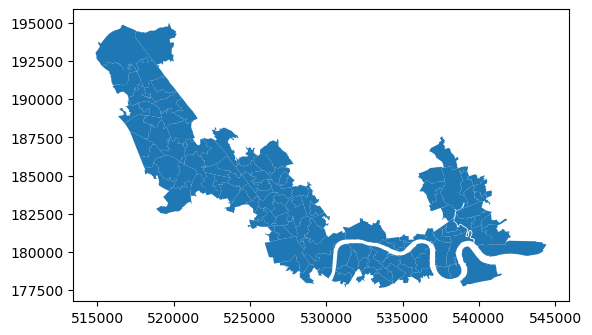

In [64]:
london_Jubilee_msoa_area_change_data.plot()

## Data for case study, data analysis